In [1]:
import yfinance as yf
import pandas as pd
from pandas_datareader import data as pdr

In [2]:
asxTicker = 'AX1.AX'

data = yf.download(
        tickers = asxTicker,
        period = "1y",
        interval="1wk")

[*********************100%***********************]  1 of 1 completed


In [41]:
dataFrame = pd.DataFrame({"Open":data['Open'], "Close": data['Close'], "Volume": data['Volume']})

dataFrame['Delta'] = dataFrame['Close'] - dataFrame['Open']

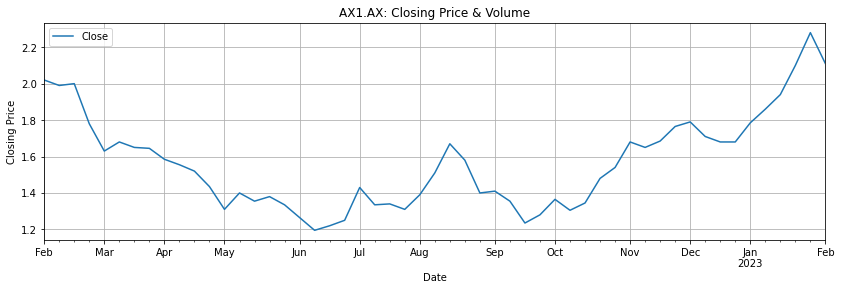

In [42]:
dataFrame = dataFrame.reset_index()

dataFrame.plot(x = 'Date', y = 'Close',
            title= asxTicker + ': ' + 'Closing Price & Volume',
            ylabel="Closing Price",
            xlabel="Date",
            grid=True,
            figsize=(14, 4))

print("")

In [7]:
def func(row):
    
    if row['Open'] > row['Close']:
        val = "Gain"
    elif row['Close'] < row['Open']:
        val = "Loss"
    else:
        val = "No Change"
    return val

dataFrame['Price Movement (Gain/Loss)'] = dataFrame.apply(func, axis=1)

In [8]:
dataFrame

,Date,Open,Close,Volume,Delta,Price Movement (Gain/Loss)
0,2022-02-07 00:00:00+11:00,2.070,2.020,2083845,-0.050,Gain
1,2022-02-14 00:00:00+11:00,2.020,1.990,3203115,-0.030,Gain
2,2022-02-21 00:00:00+11:00,1.990,2.000,9188667,0.010,No Change
3,2022-02-28 00:00:00+11:00,1.960,1.780,12165485,-0.180,Gain
4,2022-03-07 00:00:00+11:00,1.780,1.630,8146640,-0.150,Gain
5,2022-03-14 00:00:00+11:00,1.660,1.680,8101470,0.020,No Change
6,2022-03-21 00:00:00+11:00,1.700,1.650,5485671,-0.050,Gain
7,2022-03-28 00:00:00+11:00,1.680,1.645,5528823,-0.035,Gain
8,2022-04-04 00:00:00+10:00,1.670,1.585,5658779,-0.085,Gain
9,2022-04-11 00:00:00+10:00,1.590,1.555,5333845,-0.035,Gain
